In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data=pd.read_excel('output7.xlsx')
data=data.drop('Unnamed: 0',axis=1)
data

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸
0,1976,1,4,2,4,1,16,7,20,2,...,95.0,104.0,70.0,80.0,4.84,4.13,1.33,2.92,1.59,298.2
1,1968,1,4,2,9,1,20,7,10,1,...,97.0,106.0,70.0,70.0,5.10,4.41,1.37,3.15,1.87,350.9
2,1976,1,4,1,12,1,20,7,10,2,...,79.0,90.0,60.0,68.0,4.34,4.06,1.20,2.79,0.73,333.1
3,1962,1,4,2,12,1,23,7,20,2,...,99.0,120.0,80.0,80.0,5.43,4.89,1.03,3.87,1.73,310.2
4,1986,1,4,1,4,1,19,7,15,2,...,109.0,112.0,80.0,78.0,4.56,5.50,0.88,3.33,1.05,412.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1972,2,2,2,9,3,0,0,0,2,...,99.5,118.0,72.0,80.0,3.87,4.89,0.99,2.36,2.25,287.2
7831,1944,2,2,2,10,3,0,0,0,1,...,104.0,136.0,64.0,82.0,4.89,7.19,1.02,3.06,3.83,231.7
7832,1974,2,4,2,10,3,0,0,0,2,...,90.5,90.0,60.0,72.0,4.48,4.61,1.35,2.77,0.56,214.9
7833,1945,2,2,2,10,3,0,0,0,2,...,99.0,148.0,60.0,81.0,5.74,5.20,1.24,3.91,0.83,209.8


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_values(df,x,y,z,target_column):
    ## gettting all the features except survived
    age_df=df.iloc[:,x:y]
    temp_train = age_df.loc[age_df[target_column].notnull()] 
    temp_test = age_df.loc[age_df[target_column].isnull()] 
#     temp_train = age_df.loc[age_df.是否吸烟.notnull()] ## df with age values
#     temp_test = age_df.loc[age_df.是否吸烟.isnull()] ## df without age values
    
    y = temp_train[target_column].values ## setting target variables(age) in y 
    X = temp_train.iloc[:,x:z ].values
    
    rmse = []
    nestimators = []
    predict_age=[]
    for n in [1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800]:
        rfr = RandomForestRegressor(n_estimators=n,n_jobs=-1,random_state=0)
        rfr.fit(X, y)
        y_predict = rfr.predict(temp_train.iloc[:,x:z].values)
        y_test=temp_train[target_column].values
        
        rmse=np.append(rmse,np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
        nestimators=np.append(nestimators,n)
        predicted_age =np.append(predict_age,rfr.predict(temp_test.iloc[:,x:z].values))
    
    index_of_minimum = np.argmin(rmse)#找到rmse数组的最小值，即最优值的索引
    predict_age=predict_age=[index_of_minimum]
    predicted_age1=predicted_age.astype(int)
    print(index_of_minimum)
    print(rmse[index_of_minimum])
    df.loc[df[target_column].isnull(), target_column] = predicted_age1
    


    
    # Creating a bar plot
    sns.set_style('whitegrid')
    plt.plot(nestimators,rmse,'ro',linestyle='dashed',linewidth=1,markersize=10)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features/RMSE")
    
    #plt.savefig('output.png', dpi=4000, bbox_inches='tight')  #将图片保存到磁盘
    plt.show()
    return df

15
0.36596567265643193


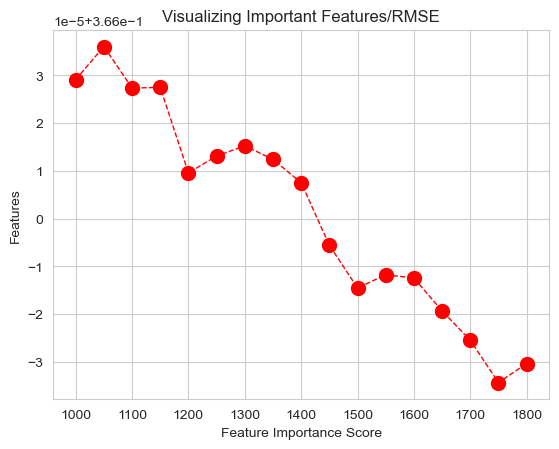

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸
0,1976,1,4,2,4,1,16,7,20,2,...,95.0,104.0,70.0,80.0,4.84,4.13,1.33,2.92,1.59,298.2
1,1968,1,4,2,9,1,20,7,10,1,...,97.0,106.0,70.0,70.0,5.10,4.41,1.37,3.15,1.87,350.9
2,1976,1,4,1,12,1,20,7,10,2,...,79.0,90.0,60.0,68.0,4.34,4.06,1.20,2.79,0.73,333.1
3,1962,1,4,2,12,1,23,7,20,2,...,99.0,120.0,80.0,80.0,5.43,4.89,1.03,3.87,1.73,310.2
4,1986,1,4,1,4,1,19,7,15,2,...,109.0,112.0,80.0,78.0,4.56,5.50,0.88,3.33,1.05,412.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1972,2,2,2,9,3,0,0,0,2,...,99.5,118.0,72.0,80.0,3.87,4.89,0.99,2.36,2.25,287.2
7831,1944,2,2,2,10,3,0,0,0,1,...,104.0,136.0,64.0,82.0,4.89,7.19,1.02,3.06,3.83,231.7
7832,1974,2,4,2,10,3,0,0,0,2,...,90.5,90.0,60.0,72.0,4.48,4.61,1.35,2.77,0.56,214.9
7833,1945,2,2,2,10,3,0,0,0,2,...,99.0,148.0,60.0,81.0,5.74,5.20,1.24,3.91,0.83,209.8


In [68]:
completing_values(data,0,12,5,'是否饮酒')

In [69]:
data5=data[data.是否饮酒==2]
data6=data[data.是否饮酒==1]
data7=data[data.是否饮酒==3]

In [70]:
columns_to_fill=['饮酒年数', '是否饮用高度白酒','平均每次饮用量','饮用频率','是否饮用低度白酒','饮用频率_1',
                       '平均每次饮用量_1','是否饮用啤酒','饮用频率_2','平均每次饮用量_2','是否饮用黄酒或糯米酒','饮用频率_3',
                      '平均每次饮用量_3','是否饮用葡萄酒','饮用频率_4','平均每次饮用量_4']
data7[columns_to_fill] = data7[columns_to_fill].fillna(0)
data5[columns_to_fill] = data5[columns_to_fill].fillna(0)


KeyError: "['平均每次饮用量', '饮用频率', '饮用频率_1', '平均每次饮用量_1', '饮用频率_2', '平均每次饮用量_2', '饮用频率_3', '平均每次饮用量_3', '饮用频率_4', '平均每次饮用量_4'] not in index"

In [ ]:
completing_values(data6,0,13,6,'饮酒年数')

In [ ]:
completing_values(data6,0,14,7,'是否饮用高度白酒')

In [ ]:
data=pd.concat([data5,data6,data7],axis=0,ignore_index=True)

In [ ]:
data_temp=data[['是否吸烟','开始吸烟年龄','平均每周吸烟天数','一天吸烟支数','是否被动吸烟','被动吸烟天数为']]
data=data.drop(['是否吸烟','开始吸烟年龄','平均每周吸烟天数','一天吸烟支数','是否被动吸烟','被动吸烟天数为'],axis=1)
data=pd.concat([data,data_temp],axis=1,ignore_index=False)

In [ ]:
data5=data[data.是否饮酒==2]
data6=data[data.是否饮酒==1]
data7=data[data.是否饮酒==3]

In [ ]:
completing_values(data6,0,9,8,'饮用频率')

In [ ]:
completing_values(data6,0,10,9,'平均每次饮用量')

In [ ]:
data=pd.concat([data5,data6,data7],axis=0,ignore_index=True)

In [ ]:
completing_values(data,0,11,7,'是否饮用低度白酒')

In [ ]:
completing_values(data,0,12,7,'饮用频率_1')

In [ ]:
temp_data=data[['是否饮用高度白酒','饮用频率','平均每次饮用量']]
data=data.drop(['是否饮用高度白酒','饮用频率','平均每次饮用量'],axis=1)
data=pd.concat([data,temp_data],axis=1,ignore_index=False)


In [ ]:
completing_values(data,0,10,9,'平均每次饮用量_1')

In [ ]:
temp_data=data[['是否饮用低度白酒','饮用频率_1','平均每次饮用量_1']]
data=data.drop(['是否饮用低度白酒','饮用频率_1','平均每次饮用量_1'],axis=1)
data=pd.concat([data,temp_data],axis=1,ignore_index=False)

In [ ]:
completing_values(data,0,8,7,'是否饮用啤酒')

In [ ]:
completing_values(data,0,9,8,'饮用频率_2')

In [ ]:
completing_values(data,0,10,9,'平均每次饮用量_2')

In [ ]:
temp_data=data[['是否饮用啤酒','饮用频率_2','平均每次饮用量_2']]
data=data.drop(['是否饮用啤酒','饮用频率_2','平均每次饮用量_2'],axis=1)
data=pd.concat([data,temp_data],axis=1,ignore_index=False)

In [ ]:
completing_values(data,0,8,7,'是否饮用黄酒或糯米酒')

In [ ]:
completing_values(data,0,9,8,'饮用频率_3')

In [ ]:

completing_values(data,0,10,9,'平均每次饮用量_3')

In [ ]:
temp_data=data[['是否饮用黄酒或糯米酒','饮用频率_3','平均每次饮用量_3']]
data=data.drop(['是否饮用黄酒或糯米酒','饮用频率_3','平均每次饮用量_3'],axis=1)
data=pd.concat([data,temp_data],axis=1,ignore_index=False)

In [ ]:
completing_values(data,0,8,7,'是否饮用葡萄酒')

In [ ]:
completing_values(data,0,9,8,'饮用频率_4')

In [ ]:
completing_values(data,0,10,9,'平均每次饮用量_4')

In [ ]:
temp_data=data[['是否饮用葡萄酒','饮用频率_4','平均每次饮用量_4']]
data=data.drop(['是否饮用葡萄酒','饮用频率_4','平均每次饮用量_4'],axis=1)
data=pd.concat([data,temp_data],axis=1,ignore_index=False)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data=pd.read_excel('output8.xlsx')
temp1_data=data[['是否饮酒','饮酒年数']]
temp_data=data[['出生年','性别','文化程度','婚姻状况','职业']]
data1=data.drop(['出生年','性别','文化程度','婚姻状况','职业','是否饮酒','饮酒年数'],axis=1)
temp_temp_data=data1.iloc[:,209:232]
temp_temp_temp_data=data1.iloc[:,203:209]
target_columns=[223,222,221,220,219,218,217,216,215,214,213,212,211,210,209,208,207,206,205,204,203]
data2=data1.drop(data1.columns[target_columns],axis=1)
data3=pd.concat([temp_data,temp_temp_temp_data,temp1_data,temp_temp_data,data2],axis=1,ignore_index=False)
data3

In [ ]:
data3

In [ ]:
# 将指定列名存储在列表中
columns_to_fill = ['不吃早餐','在家吃早餐','早餐带餐到单位','单位食堂早餐','在餐馆或街头吃早餐','工作日在家吃早餐人数','周末在家吃早餐人数','不吃中餐','在家吃中餐','中餐带餐到单位','单位食堂中餐','在餐馆或街头吃中餐','工作日在家吃中餐人数','周末在家吃中餐人数','不吃晚餐','在家吃晚餐','晚餐带餐到单位','单位食堂晚餐','在餐馆或街头吃晚餐','工作日在家吃晚餐人数','周末在家吃晚餐人数']

# 使用fillna()函数将指定列中的空缺值赋值为0
data3[columns_to_fill] = data3[columns_to_fill].fillna(0)

In [ ]:
# 筛选需要的目标列
selected_columns = [50,51,52,55,56,57,60,61,62,65,66,67,70,71,72,75,76,77,80,81,82,85,86,87,90,91,92,95,96,97,100,101,102,105,106,107,110,111,112,115,116,117,120,121,122,125,126,127,130,131,132,135,136,137,140,141,142,145,146,147,150,151,152,155,156,157,160,161,162,165,166,167,170,171,172,175,176,177,180,181,182]

result = pd.DataFrame()
# 按每三列进行分组并进行操作
for i in range(0, len(selected_columns), 3):
    group_data = data3.iloc[:, selected_columns[i:i+3]]  # 获取每个分组的数据

    # 将空缺数据赋值为0
    group_data = group_data.fillna(0)

    # 将第一列的值赋值为第一列与第二列与第三列的加权平均值
    group_data.iloc[:, 0] = group_data.iloc[:, 0] + group_data.iloc[:, 1]/7 + group_data.iloc[:, 2]/30

    # 删除第二列和第三列
    group_data = group_data.drop(columns=[group_data.columns[1], group_data.columns[2]])

    # 将处理后的分组数据添加到结果DataFrame中
    result = pd.concat([result, group_data], axis=1)
    # 输出结果
    print(result)
    # 输出结果到Excel文件
    result.to_excel('output_result.xlsx', index=False)

In [ ]:
# 筛选需要删除的目标列（假设要删除第2、4、6列）
target_columns = [50,51,52,55,56,57,60,61,62,65,66,67,70,71,72,75,76,77,80,81,82,85,86,87,90,91,92,95,96,97,100,101,102,105,106,107,110,111,112,115,116,117,120,121,122,125,126,127,130,131,132,135,136,137,140,141,142,145,146,147,150,151,152,155,156,157,160,161,162,165,166,167,170,171,172,175,176,177,180,181,182]

# 删除目标列中每行的数据
data1 = data3.drop(data3.columns[target_columns], axis=1)

# 输出处理后的数据
print(data1)

data1.to_excel('output_path.xlsx', index=False)

In [ ]:
# 读取第一个Excel文件
df1 = pd.read_excel('output_path.xlsx')

# 读取第二个Excel文件
df2 = pd.read_excel('output_result.xlsx')

# 将两个DataFrame拼接在一起
combined_df = pd.concat([df1, df2],axis=1,ignore_index=False)

# 输出拼接后的DataFrame
print(combined_df)

# 保存拼接后的DataFrame为Excel文件
output_path = 'combined.xlsx'
combined_df.to_excel(output_path, index=False)

print('combined.xlsx')

# 分界线

In [ ]:
data1=pd.read_excel('combined.xlsx')

In [ ]:
target_columns = [49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
                 ,91,92,93,94,95,96,97,98,99,100,101,102]
